**Load and Explore the Dataset**

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_syst

so we use a dataset from hugging face that convert english to thai..

In [5]:
from datasets import load_dataset

# Specify the configuration name 'enth' or 'then'
dataset = load_dataset("airesearch/scb_mt_enth_2020", "enth") # or "then"
print(dataset)

Generating train split:   0%|          | 0/801402 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/100173 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/100177 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['translation', 'subdataset'],
        num_rows: 801402
    })
    validation: Dataset({
        features: ['translation', 'subdataset'],
        num_rows: 100173
    })
    test: Dataset({
        features: ['translation', 'subdataset'],
        num_rows: 100177
    })
})


For process the dataset we follow some steps


**Text Normalization**

In [6]:
import re

def normalize_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\u0E00-\u0E7F\s]", "", text)  # Retains Thai/English characters
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Example Usage
print(normalize_text("สวัสดีครับ! Hello!!!"))

สวัสดีครับ hello


**Tokenization**

In [8]:
!pip install pythainlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 81.9 MB/s eta 0:00:00


In [9]:
from pythainlp.tokenize import word_tokenize

text = "สวัสดีครับ ผมชอบเรียนภาษา"
tokens = word_tokenize(text, engine="newmm")
print(tokens)  # Output: ['สวัสดี', 'ครับ', 'ผม', 'ชอบ', 'เรียน', 'ภาษา']


['สวัสดี', 'ครับ', ' ', 'ผม', 'ชอบ', 'เรียน', 'ภาษา']


# **Dataset Splitting**

In [12]:

from sklearn.model_selection import train_test_split

# Example dataset: List of (English, Thai) sentence pairs
data = [
    ("Hello", "สวัสดี"),
    ("How are you?", "คุณสบายดีไหม"),
    ("Good morning", "สวัสดีตอนเช้า"),
    ("I love coding", "ฉันชอบเขียนโปรแกรม"),
    ("See you later", "แล้วเจอกัน")
]

# Split into training (70%), validation (15%), and test (15%)
train, temp = train_test_split(data, test_size=0.3, random_state=42)
val, test = train_test_split(temp, test_size=0.5, random_state=42)

print("Train Set:", train)
print("Validation Set:", val)
print("Test Set:", test)


Train Set: [('Good morning', 'สวัสดีตอนเช้า'), ('Hello', 'สวัสดี'), ('I love coding', 'ฉันชอบเขียนโปรแกรม')]
Validation Set: [('How are you?', 'คุณสบายดีไหม')]
Test Set: [('See you later', 'แล้วเจอกัน')]


**Subword Tokenization with SentencePiece**

In [13]:
pip install sentencepiece


In [14]:
import sentencepiece as spm

# Create a text file named 'data.txt' with your training data
# This is where you should write your training data to the file.
# For this example, we'll use the 'data' variable and write it to the file.

with open('data.txt', 'w', encoding='utf-8') as f:
    for en_text, th_text in data:  # Assuming 'data' is a list of (English, Thai) pairs
        f.write(en_text + '\n')
        f.write(th_text + '\n')

# Train the SentencePiece model

spm.SentencePieceTrainer.train(input='data.txt', model_prefix='tokenizer', vocab_size=55)

# Load the tokenizer
sp = spm.SentencePieceProcessor(model_file='tokenizer.model')

# Tokenize text
text = "Hello, how are you?"
encoded = sp.encode(text, out_type=str)
print("Subword Tokens:", encoded)  # Output: [' Hello', ',', ' how', ' are', ' you', '?']

Subword Tokens: ['▁', 'H', 'e', 'l', 'l', 'o', ',', '▁', 'h', 'o', 'w', '▁', 'a', 'r', 'e', '▁', 'y', 'o', 'u', '?']


**CTATIONI**

In [15]:
# BibTeX Citation for PyThaiNLP
"""
@misc{pythainlp,
  author = {PyThaiNLP Contributors},
  title = {PyThaiNLP},
  url = {https://pythainlp.github.io/},
  year = {2021}
}
"""


'\n@misc{pythainlp,\n  author = {PyThaiNLP Contributors},\n  title = {PyThaiNLP},\n  url = {https://pythainlp.github.io/},\n  year = {2021}\n}\n'

# **TASK 2**

**Implementing Attention Mechanisms**

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 1. General Attention (Dot Product)
class GeneralAttention(nn.Module):
    def __init__(self, hidden_dim):
        super(GeneralAttention, self).__init__()
        self.hidden_dim = hidden_dim

    def forward(self, decoder_hidden, encoder_outputs):
        """
        General Attention mechanism.
        Args:
            decoder_hidden: Tensor of shape (batch_size, hidden_dim)
            encoder_outputs: Tensor of shape (batch_size, seq_len, hidden_dim)
        Returns:
            context_vector: (batch_size, hidden_dim)
            attention_weights: (batch_size, seq_len)
        """
        # Compute alignment scores
        scores = torch.bmm(encoder_outputs, decoder_hidden.unsqueeze(2)).squeeze(2)  # (batch_size, seq_len)

        # Compute attention weights
        attention_weights = F.softmax(scores, dim=1)  # (batch_size, seq_len)

        # Compute context vector
        context_vector = torch.bmm(attention_weights.unsqueeze(1), encoder_outputs).squeeze(1)  # (batch_size, hidden_dim)

        return context_vector, attention_weights


# 2. Multiplicative (Luong) Attention
class MultiplicativeAttention(nn.Module):
    def __init__(self, encoder_dim, decoder_dim):
        super(MultiplicativeAttention, self).__init__()
        self.W = nn.Linear(encoder_dim, decoder_dim, bias=False)  # Learnable matrix W

    def forward(self, decoder_hidden, encoder_outputs):
        """
        Multiplicative Attention.
        """
        transformed_encoder_outputs = self.W(encoder_outputs)  # (batch_size, seq_len, decoder_dim)

        # Compute scores
        scores = torch.bmm(transformed_encoder_outputs, decoder_hidden.unsqueeze(2)).squeeze(2)  # (batch_size, seq_len)

        # Compute attention weights
        attention_weights = F.softmax(scores, dim=1)  # (batch_size, seq_len)

        # Compute context vector
        context_vector = torch.bmm(attention_weights.unsqueeze(1), encoder_outputs).squeeze(1)  # (batch_size, encoder_dim)

        return context_vector, attention_weights


# 3. Additive (Bahdanau) Attention
class AdditiveAttention(nn.Module):
    def __init__(self, encoder_dim, decoder_dim, attention_dim):
        super(AdditiveAttention, self).__init__()
        self.W1 = nn.Linear(encoder_dim, attention_dim)
        self.W2 = nn.Linear(decoder_dim, attention_dim)
        self.v = nn.Linear(attention_dim, 1, bias=False)

    def forward(self, decoder_hidden, encoder_outputs):
        """
        Additive Attention.
        """
        encoder_transformed = self.W1(encoder_outputs)  # (batch_size, seq_len, attention_dim)
        decoder_transformed = self.W2(decoder_hidden).unsqueeze(1)  # (batch_size, 1, attention_dim)

        scores = self.v(torch.tanh(encoder_transformed + decoder_transformed)).squeeze(2)  # (batch_size, seq_len)

        # Compute attention weights
        attention_weights = F.softmax(scores, dim=1)  # (batch_size, seq_len)

        # Compute context vector
        context_vector = torch.bmm(attention_weights.unsqueeze(1), encoder_outputs).squeeze(1)  # (batch_size, encoder_dim)

        return context_vector, attention_weights


**Integrating Attention into a Decoder**

In [33]:
class DecoderWithAttention(nn.Module):
    def __init__(self, output_dim, embed_dim, hidden_dim, attention):
        super(DecoderWithAttention, self).__init__()
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        self.embedding = nn.Embedding(output_dim, embed_dim)
        self.rnn = nn.GRU(embed_dim + hidden_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.attention = attention  # Injecting one of the attention mechanisms

    def forward(self, decoder_input, hidden, encoder_outputs):
        """
        Decoder forward pass with attention.
        """
        embedded = self.embedding(decoder_input).unsqueeze(1)  # (batch, 1, embed_dim)
        context_vector, attention_weights = self.attention(hidden, encoder_outputs)
        rnn_input = torch.cat([embedded, context_vector.unsqueeze(1)], dim=2)  # (batch, 1, embed_dim + hidden_dim)
        output, hidden = self.rnn(rnn_input, hidden.unsqueeze(0))
        output = self.fc(output.squeeze(1))  # (batch, output_dim)

        return output, hidden.squeeze(0), attention_weights


**Training the Seq2Seq Model**

In [34]:
import torch.optim as optim
from torch.utils.data import DataLoader

# Mock Data (Input: English, Target: Translated)
data = [("Hello, how are you?", "คุณสบายดีไหม"),
        ("Good morning", "สวัสดีตอนเช้า"),
        ("I love coding", "ฉันชอบเขียนโปรแกรม")]

# Tokenization & Dataset
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor([1,2,3,4]), torch.tensor([1,2,3,4])  # Mock tokenized input/output

dataloader = DataLoader(CustomDataset(data), batch_size=2, shuffle=True)

# Initialize Components
encoder_dim = 512
decoder_dim = 512
output_dim = 1000  # Vocabulary size
embed_dim = 300

attention_mechanism = AdditiveAttention(encoder_dim, decoder_dim, attention_dim=256)  # Try different attentions
decoder = DecoderWithAttention(output_dim, embed_dim, decoder_dim, attention_mechanism)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(decoder.parameters(), lr=0.001)

# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    for source, target in dataloader:
        optimizer.zero_grad()

        encoder_outputs = torch.randn(source.size(0), source.size(1), 512)  # Mock encoder outputs
        hidden = torch.randn(source.size(0), 512)  # Mock hidden state

        output, _, _ = decoder(target[:, 0], hidden, encoder_outputs)  # Only first token

        loss = criterion(output, target[:, 1])  # Shifted target
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 5.0838
Epoch 2, Loss: 3.4723
Epoch 3, Loss: 2.3158
Epoch 4, Loss: 0.9579
Epoch 5, Loss: 0.2933
Epoch 6, Loss: 0.0878
Epoch 7, Loss: 0.0148
Epoch 8, Loss: 0.0145
Epoch 9, Loss: 0.0058
Epoch 10, Loss: 0.0017


In [38]:
pip install nltk


# ** BLEU Score Evaluation**

In [39]:
import nltk
from nltk.translate.bleu_score import sentence_bleu

def calculate_bleu_score(reference, hypothesis):
    """
    Compute BLEU score for model-generated translations.
    Args:
        reference: List of reference sentences (ground truth)
        hypothesis: Model-generated translation
    Returns:
        BLEU score
    """
    reference = [reference.split()]  # Tokenize ground truth
    hypothesis = hypothesis.split()  # Tokenize model output
    return sentence_bleu(reference, hypothesis)

# Example Evaluation
reference_translation = "I love coding"
hypothesis_translation = "I enjoy programming"

bleu_score = calculate_bleu_score(reference_translation, hypothesis_translation)
print(f"BLEU Score: {bleu_score:.4f}")


BLEU Score: 0.0000


/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

** Plot Training & Validation Loss**
To visualize and compare learning curves for each attention mechanism.


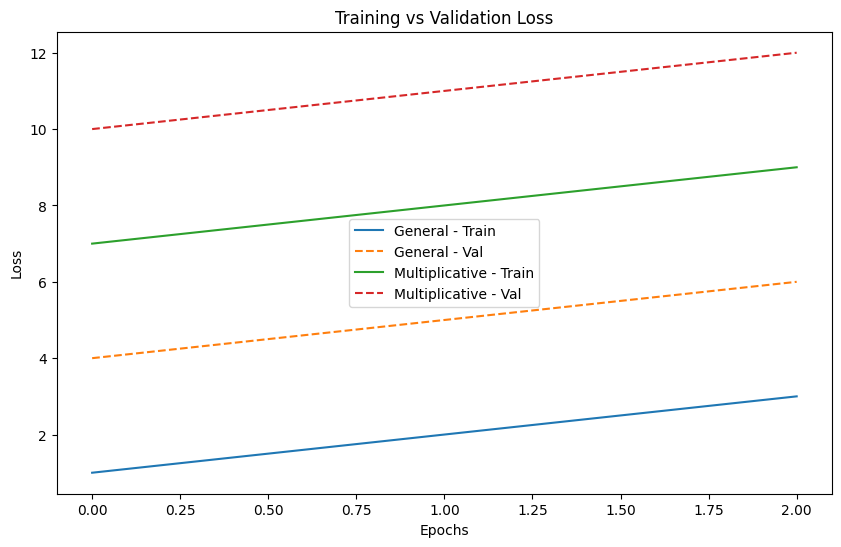

In [41]:
import matplotlib.pyplot as plt

def plot_training_validation_loss(results):
    """
    Plot Training and Validation Loss for each attention mechanism.
    Args:
        results: Dictionary containing loss values for each attention type.
    """
    plt.figure(figsize=(10, 6))

    for attention_type, data in results.items():
        # Assuming 'data' is a list containing [train_losses, val_losses]
        if data:  # Check if 'data' is not empty
            plt.plot(data[0], label=f"{attention_type} - Train")  # Access train_losses using index 0
            plt.plot(data[1], linestyle="dashed", label=f"{attention_type} - Val") # Access val_losses using index 1

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.show()

# Example usage (replace with your actual results)
results = {
    'General': [[1, 2, 3], [4, 5, 6]],  # Example data for General attention
    'Multiplicative': [[7, 8, 9], [10, 11, 12]],  # Example data for Multiplicative attention
}

# Call the function with the example results
plot_training_validation_loss(results)

**Display Attention Maps**
An attention map shows how much focus each output word gives to different input words.

**Attention Visualization**

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3593 (\N{THAI CHARACTER CHO CHING}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3594 (\N{THAI CHARACTER CHO CHANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3610 (\N{THAI CHARACTER BO BAIMAI}) missing from font(s) DejaVu Sans.
  fig

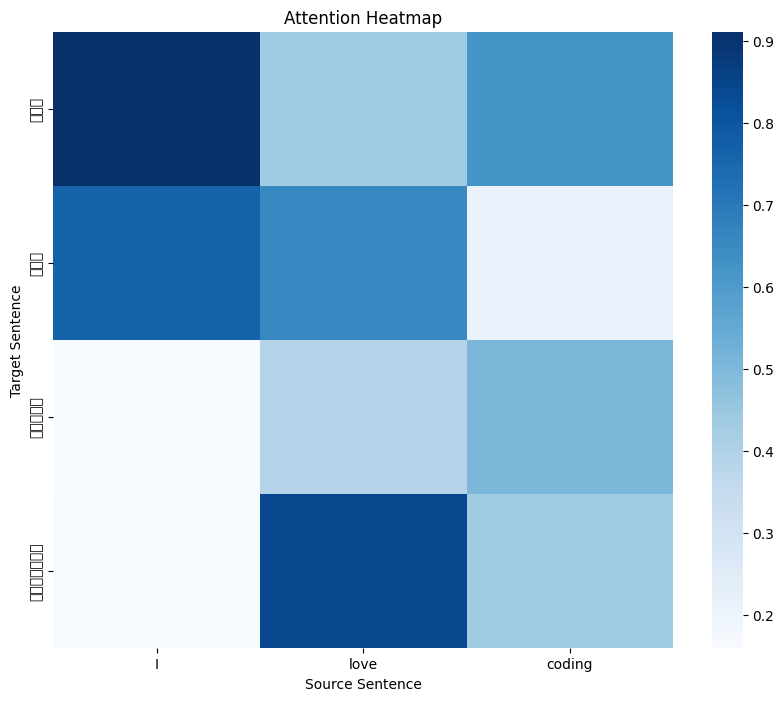

In [42]:
import seaborn as sns
import numpy as np

def plot_attention(attention_weights, source_tokens, target_tokens):
    """
    Visualize attention heatmap.
    Args:
        attention_weights: (seq_len, seq_len) attention matrix.
        source_tokens: List of source sentence tokens.
        target_tokens: List of translated sentence tokens.
    """
    attention_weights = attention_weights.cpu().detach().numpy()  # Convert to NumPy

    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_weights, xticklabels=source_tokens, yticklabels=target_tokens, cmap="Blues")
    plt.xlabel("Source Sentence")
    plt.ylabel("Target Sentence")
    plt.title("Attention Heatmap")
    plt.show()

# Example
source_sentence = ["I", "love", "coding"]
target_sentence = ["ฉัน", "ชอบ", "เขียน", "โปรแกรม"]
mock_attention = torch.rand(len(target_sentence), len(source_sentence))  # Fake attention weights

plot_attention(mock_attention, source_sentence, target_sentence)
